# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

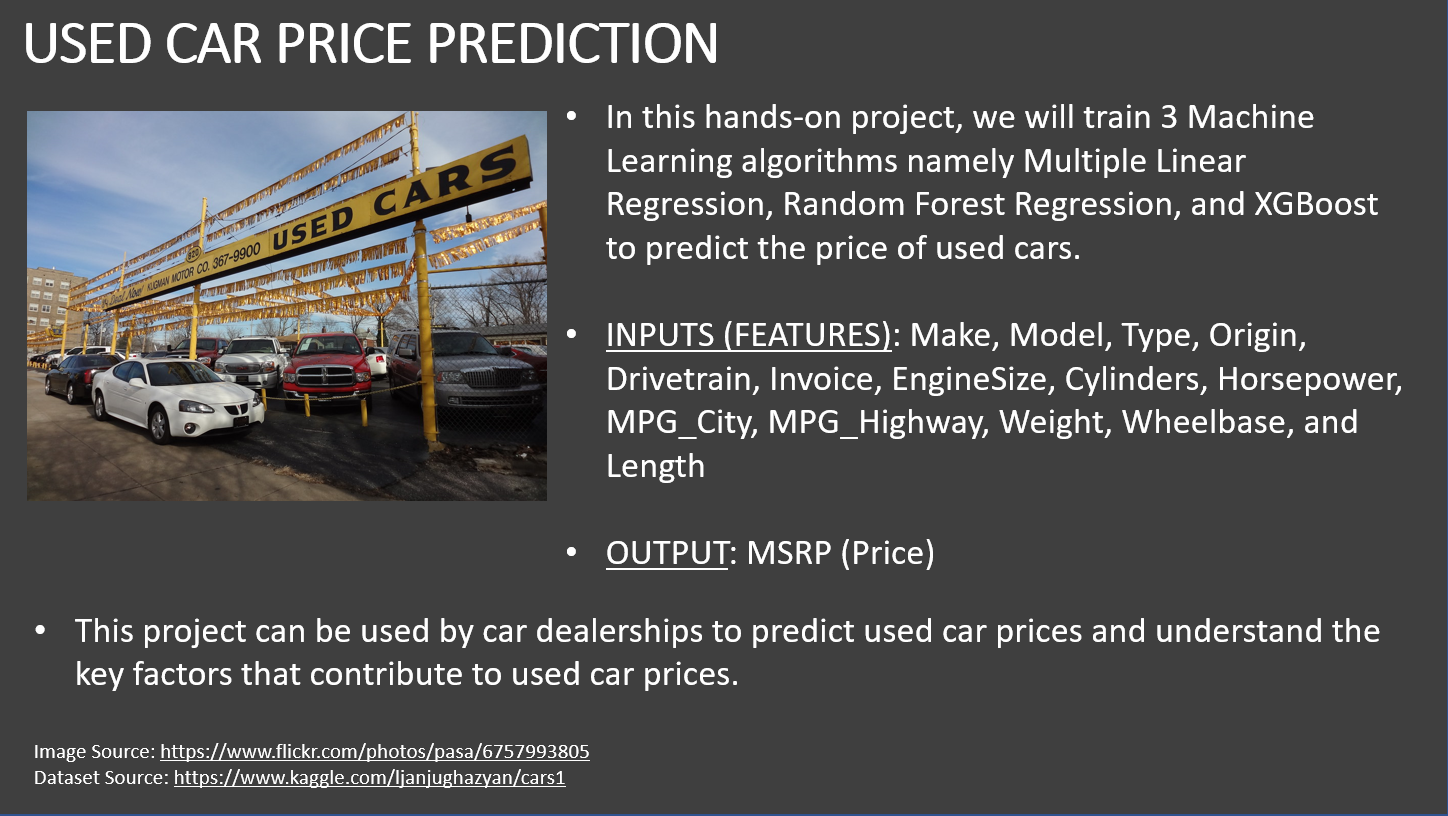

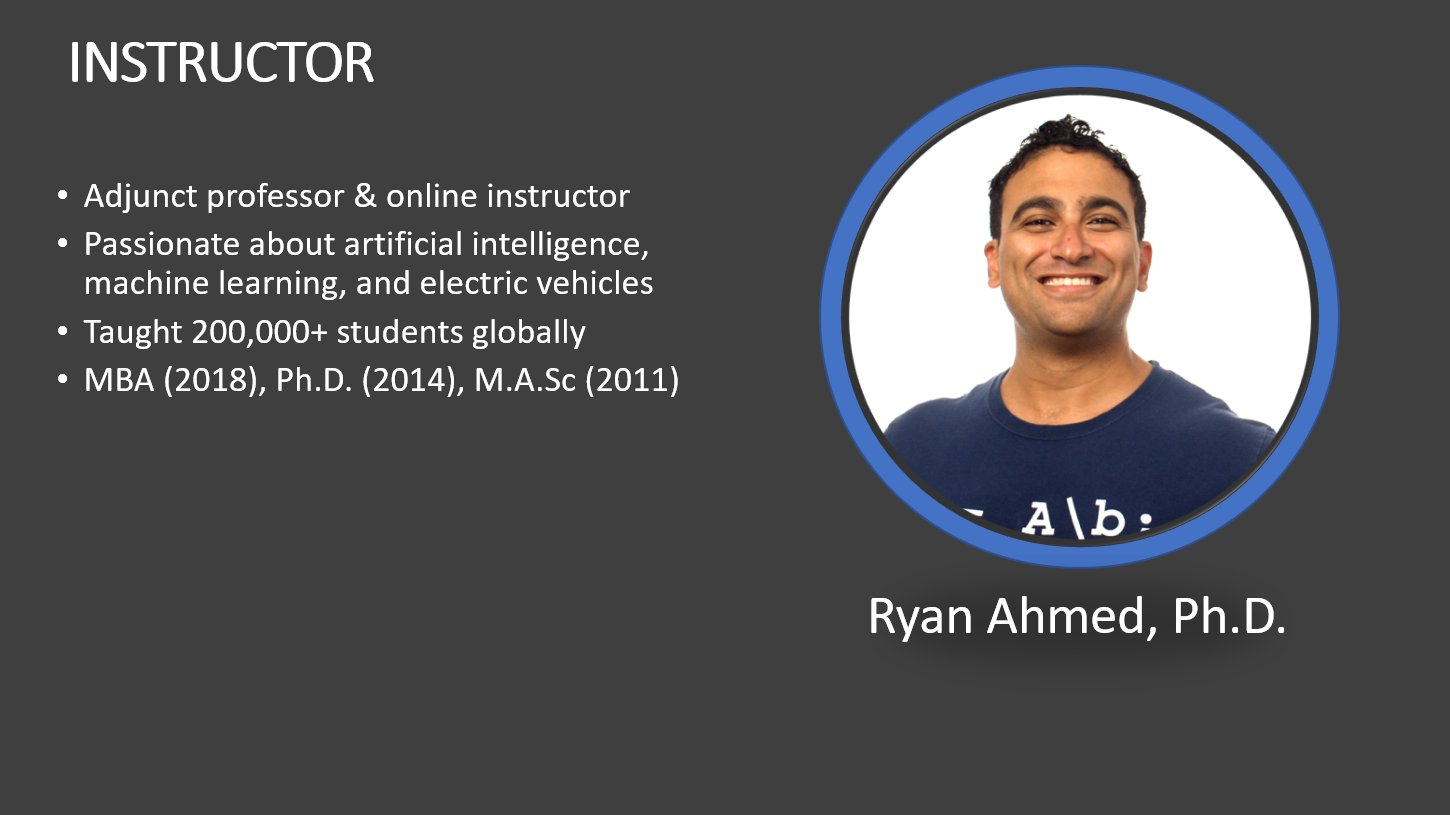

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install xgboost

In [2]:
!pip install wordcloud

In [3]:
!pip install plotly

In [5]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
#from jupyterthemes import jtplot # Jupyter Notebook Theme
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.


In [6]:
# Read the CSV file 
car_df = pd.read_csv('cars_data.csv')

In [7]:
# Load the top 10 instances
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [8]:
# Load the bottom 10 instances 
car_df.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [9]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
car_df.shape

(428, 15)

In [11]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
car_df = car_df.dropna()

In [13]:
# Obtain the summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [14]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns

car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

C:\Users\cduvi\AppData\Local\Temp/ipykernel_10780/3481706957.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [15]:
car_df["MSRP"]

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int32

MINI CHALLENGE #1:
- Repeat the same procedure for the invoice column

In [16]:
car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

C:\Users\cduvi\AppData\Local\Temp/ipykernel_10780/2349357684.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [17]:
# Let's view the updated MSRP and Invoice Columns
car_df['Invoice']

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 426, dtype: int32

In [18]:
# Display the updated summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int32  
 6   Invoice      426 non-null    int32  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 49.9+ KB


MINI CHALLENGE #2:

- What is the maximum price of the used car?
- What is the minimum price of the used car?

In [19]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [20]:
print(car_df.MSRP.max())

192465


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

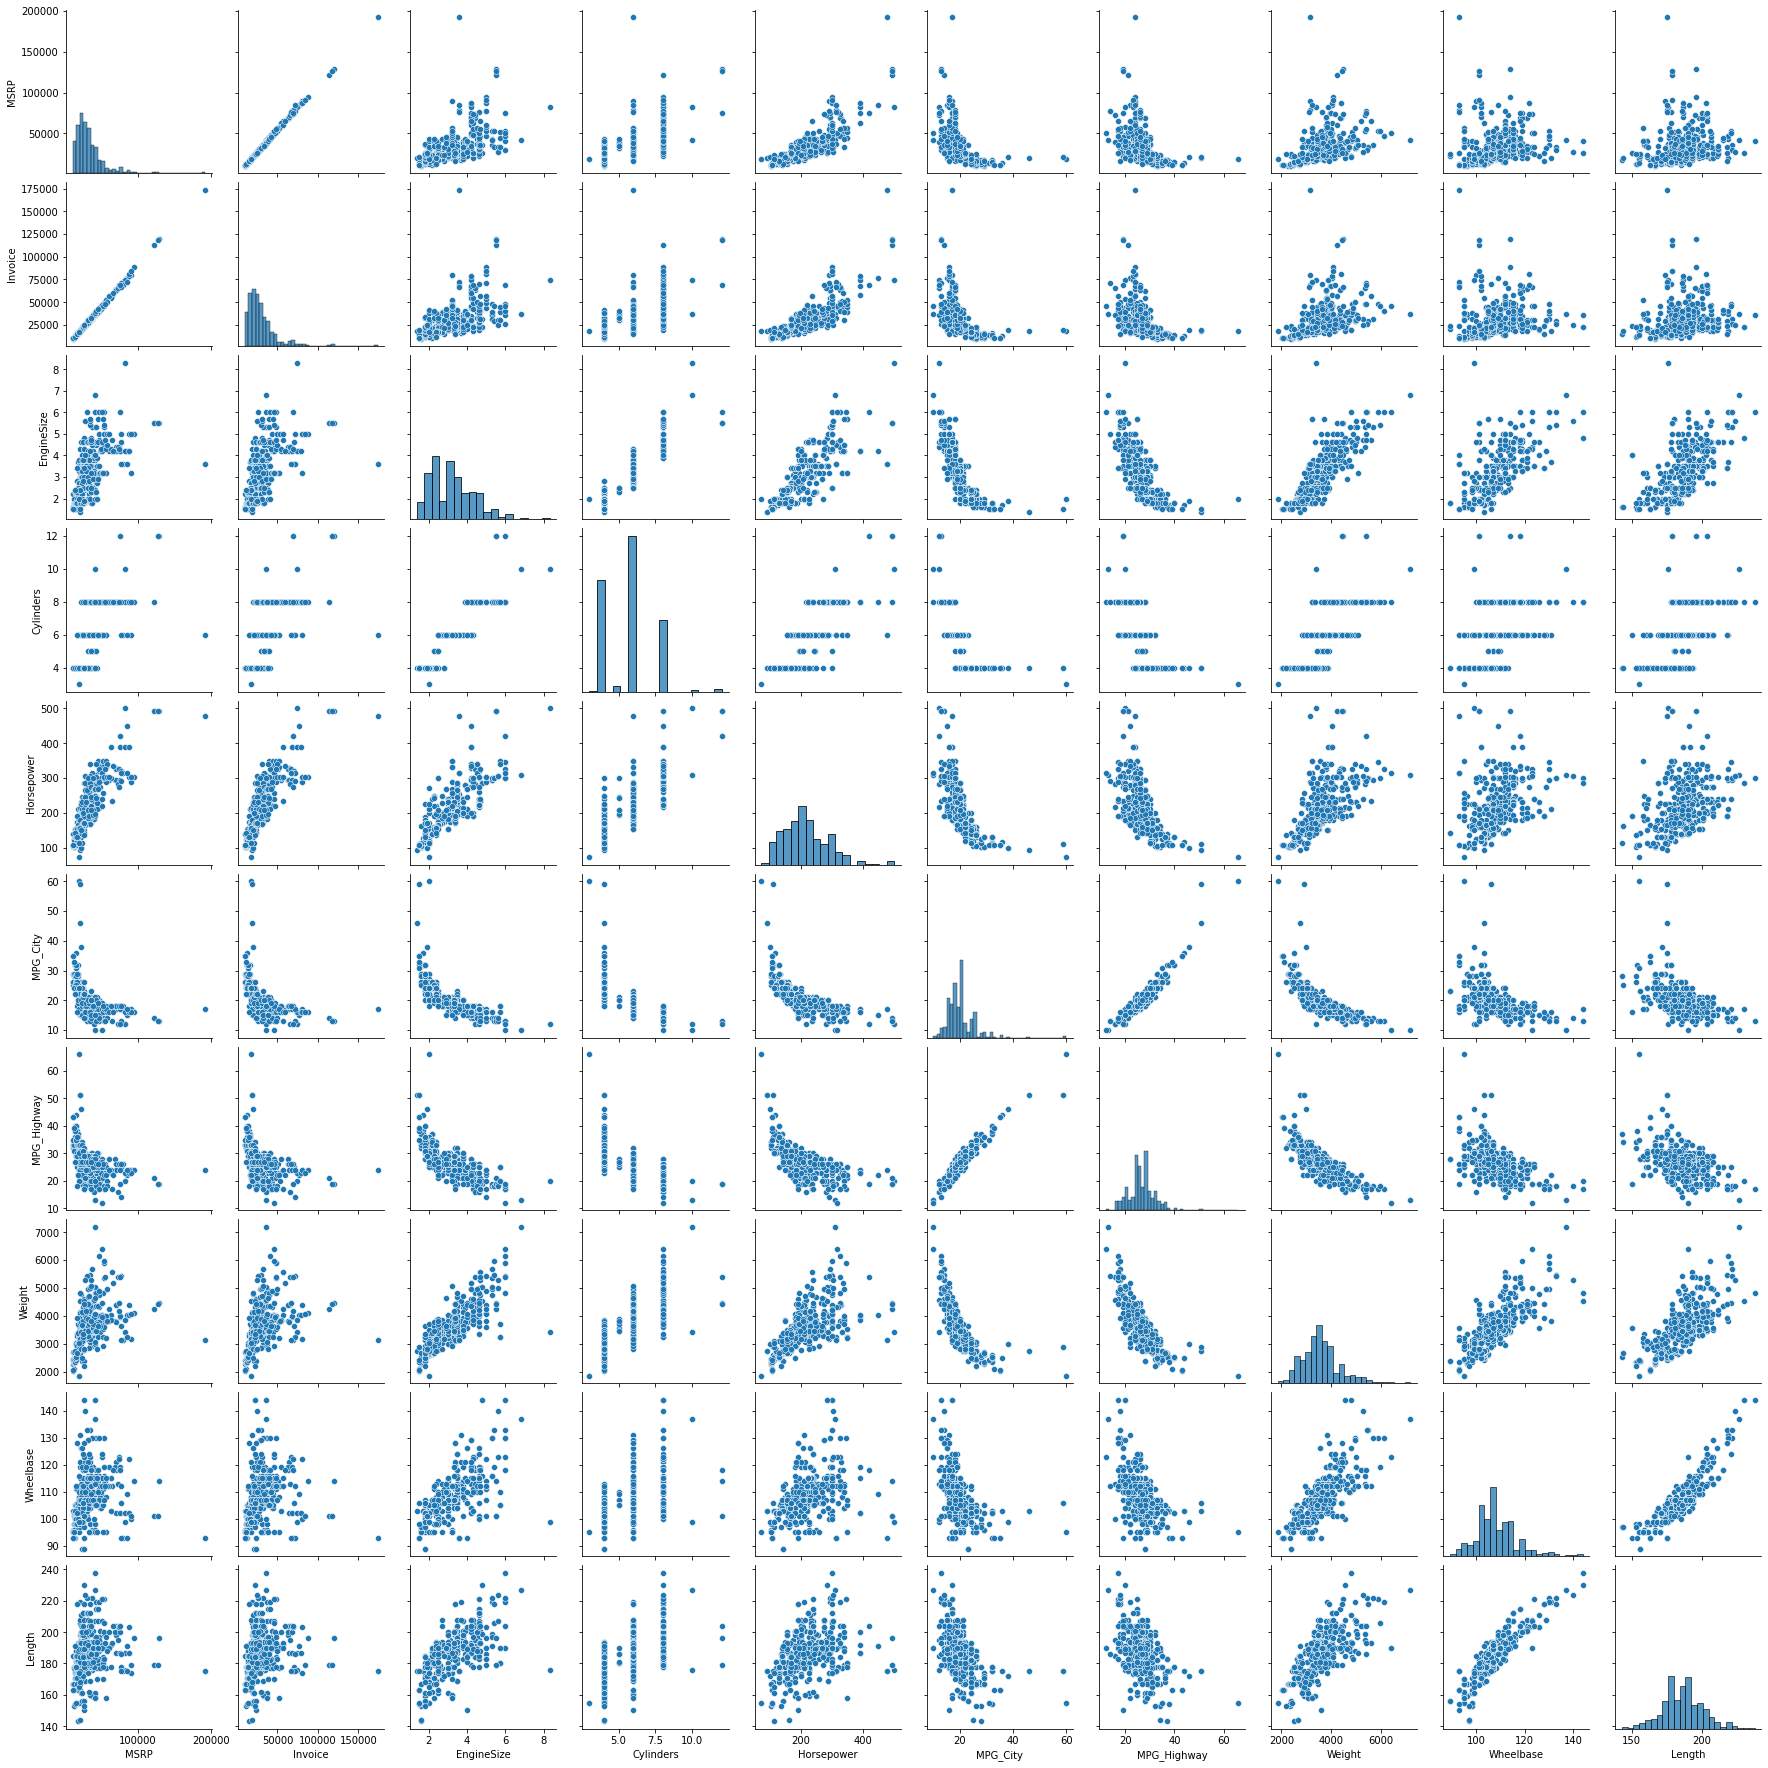

In [21]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(data = car_df)

In [22]:
# Let's view various makes of the cars
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [23]:
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [24]:
# Let's view various types of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [25]:
fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [26]:
# Let's plot the location
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [27]:
fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [28]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [29]:
fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [30]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

MINI CHALLENGE #3:

- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type 
- Find out which manufacturers has Hybrid

In [31]:
fig = px.histogram(car_df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR")
                  
fig.show()

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

In [32]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [33]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [34]:
text = car_df.Model.values

In [35]:
stopwords = set(STOPWORDS)

In [36]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

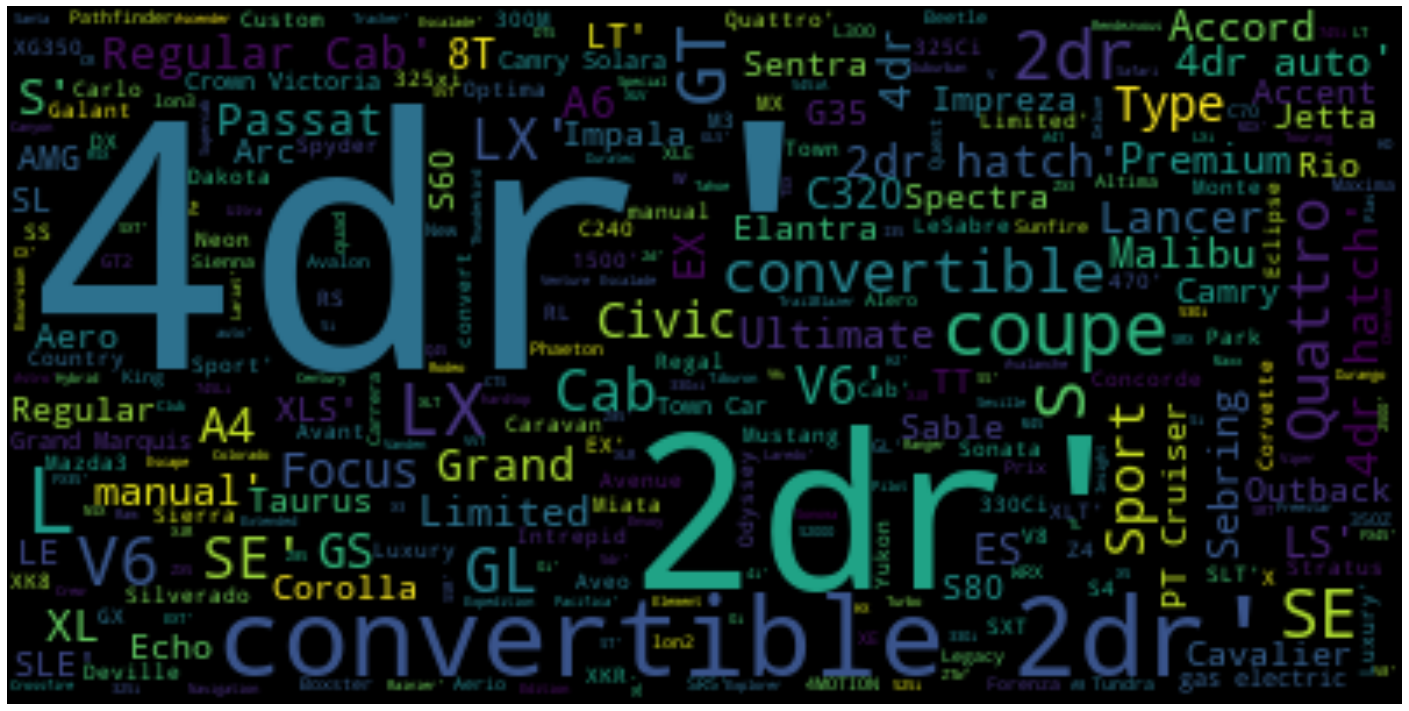

In [37]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [38]:
# Obtain the correlation matrix
car_df.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
Invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


<AxesSubplot:>

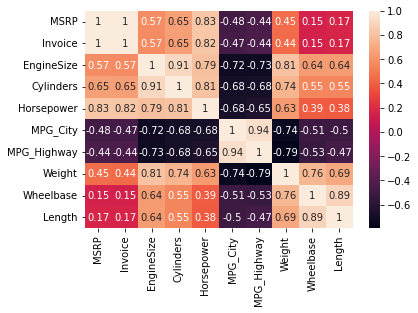

In [39]:
sns.heatmap(car_df.corr(), annot=True)

# TASK #5: PREPARE THE DATA BEFORE MODEL TRAINING

In [40]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [41]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(car_df, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [42]:
df_dum

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,38203,2.4,5.0,197,21,28,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
424,42565,40083,2.3,5.0,242,20,26,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
425,45210,42573,2.9,6.0,268,19,26,3653,110,190,...,1,0,0,0,0,1,0,0,1,0
426,26135,24641,1.9,4.0,170,22,29,2822,101,180,...,0,0,0,1,0,1,0,0,1,0


In [43]:
# Invoice feature does not contribute to car price prediction 
df_data = df_dum.drop(['Invoice'], axis=1)

In [44]:
df_data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [45]:
df_data.shape

(426, 482)

In [46]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [47]:
X = np.array(X)

In [48]:
y = np.array(y)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

MINI CHALLENGE #5:

- Verify that the split was successful 

In [51]:
print(X_train.shape)
print(y_train.shape)

(340, 481)
(340,)


# TASK #5: TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [53]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [54]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7028131373025801

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS 

In [55]:
# Photo Credits:
# https://creazilla.com/nodes/22202-giraffe-clipart 
# https://pixy.org/4569488/ 
# https://pixabay.com/illustrations/monkey-animal-gorilla-zoo-nature-4187960/ 
# https://creazilla.com/nodes/15581-running-tiger-clipart 

In [56]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5334487951863525

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [60]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.6290321289496263

# TASK #8: TRAIN AN XG-BOOST REGRESSOR MODEL

In [61]:
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.6502329530887795

# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs

C:\Users\cduvi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

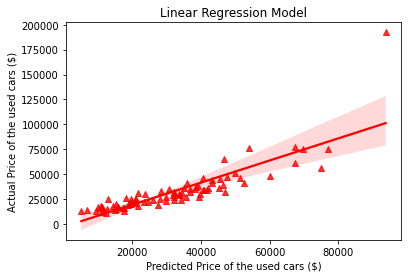

In [64]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [65]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 12558.817 
MSE = 157723893.41200784 
MAE = 6164.428336815476 
R2 = 0.7028131373025801


C:\Users\cduvi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

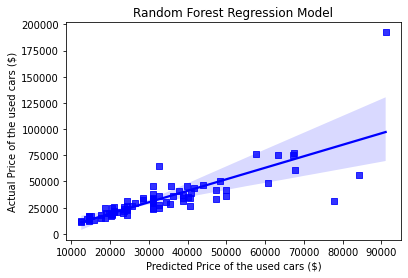

In [66]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [67]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 14031.435 
MSE = 196881169.04548684 
MAE = 6347.035713480977 
R2 = 0.6290321289496263


C:\Users\cduvi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

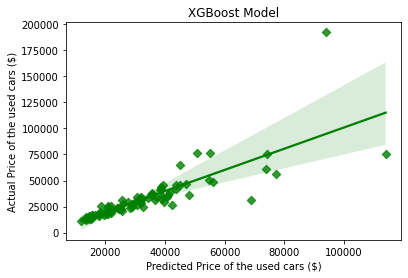

In [68]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [69]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 13624.588 
MSE = 185629404.7635136 
MAE = 5773.249364098837 
R2 = 0.6502329530887795


From the ablove results, it is clearly shown that XGBoost model scores 94% accuracy which outperforms Linear Regression and Random Forest Regression models

# EXCELLENT JOB! 